In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

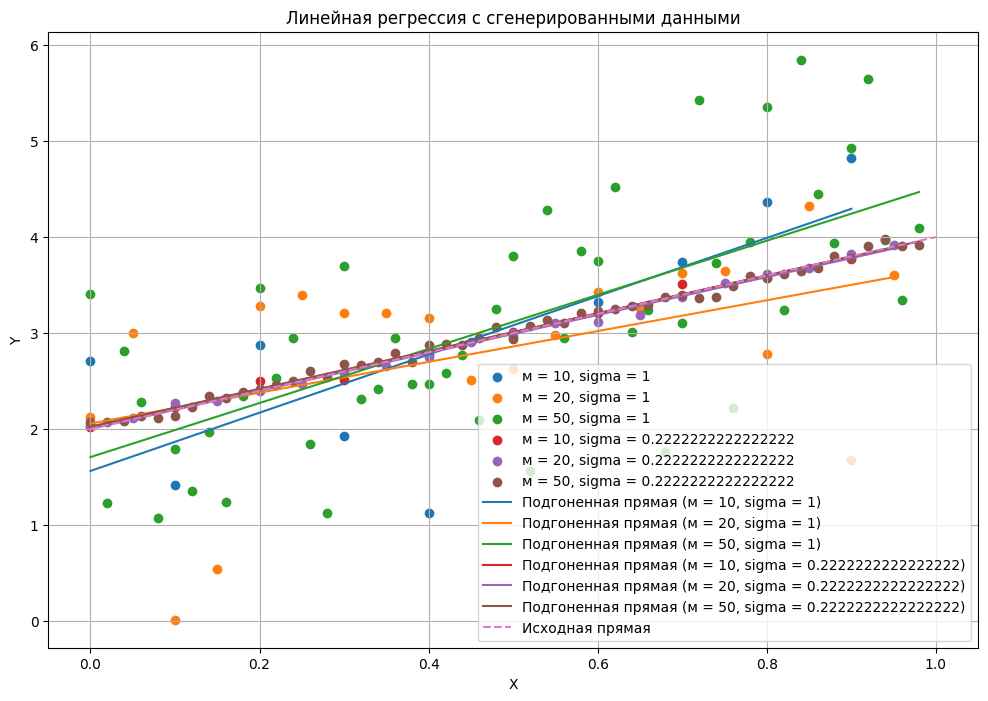

In [10]:
#1.1
m_values = [10, 20, 50]
sigma_values = [1, 2/9]

X_values = []
Y_values = []

for sigma in sigma_values:
    Y_values_sigma = []
    for m in m_values:
        X = np.arange(m) / m
        E = np.random.normal(loc=0, scale=sigma**2, size=m)
        Y = 2 * X + 2 + E
        X_values.append(X.reshape(-1, 1))
        Y_values_sigma.append(Y)
    Y_values.append(Y_values_sigma)

coef_estimates = []

for j, Y_sigma in enumerate(Y_values):
    coef_estimates_sigma = []
    for i, X in enumerate(X_values[j * len(m_values): (j + 1) * len(m_values)]):
        reg = LinearRegression().fit(X, Y_sigma[i])
        coef_estimates_sigma.append((reg.coef_[0], reg.intercept_))
    coef_estimates.append(coef_estimates_sigma)

plt.figure(figsize=(12, 8))

for j, Y_sigma in enumerate(Y_values):
    for i, X in enumerate(X_values[j * len(m_values): (j + 1) * len(m_values)]):
        plt.scatter(X, Y_sigma[i], label=f'м = {m_values[i]}, sigma = {sigma_values[j]}')

for j, coef_estimates_sigma in enumerate(coef_estimates):
    for i, (coef, intercept) in enumerate(coef_estimates_sigma):
        plt.plot(X_values[i + j * len(m_values)], coef * X_values[i + j * len(m_values)] + intercept, label=f'Подгоненная прямая (м = {m_values[i]}, sigma = {sigma_values[j]})')

plt.plot(np.linspace(0, 1, 100), 2 * np.linspace(0, 1, 100) + 2, label='Исходная прямая', linestyle='--')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Линейная регрессия с сгенерированными данными')
plt.grid(True)
plt.show()

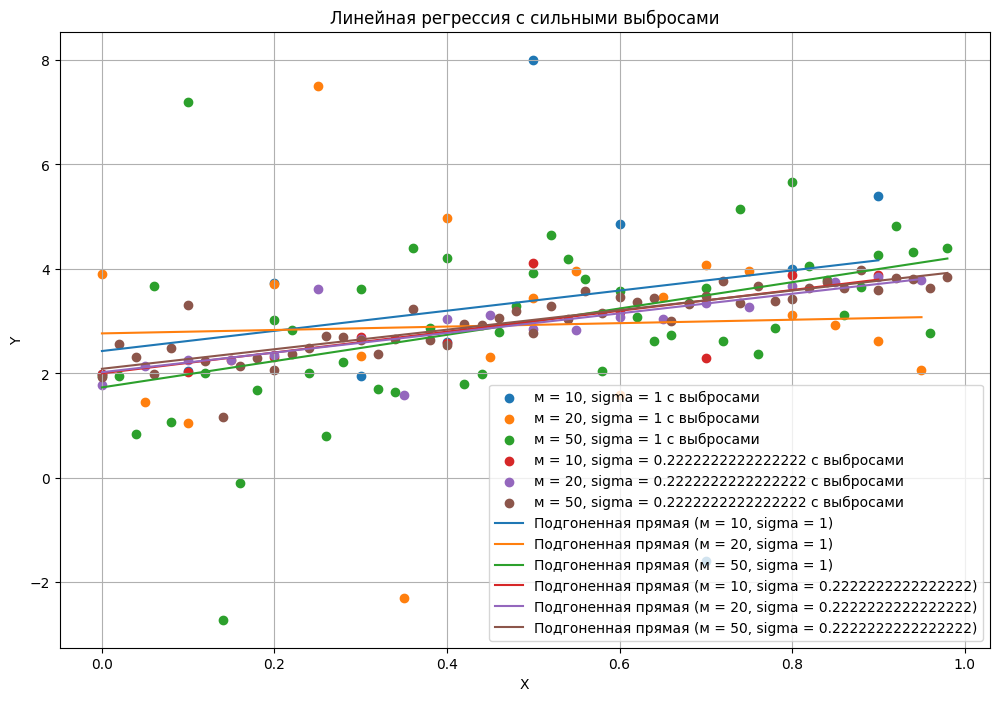

In [18]:
#2.1
t1 = 5
t2 = 7
outlier_factor = 5

Y_values_outliers = []
for sigma in sigma_values:
    Y_values_sigma_outliers = []
    for m in m_values:
        X = np.arange(m) / m
        E = np.random.normal(loc=0, scale=sigma, size=m)
        Y = 2 * X + 2 + E
        Y[t1] = 2 * X[t1] + 2 + outlier_factor * sigma
        Y[t2] = 2 * X[t2] + 2 - outlier_factor * sigma
        Y_values_sigma_outliers.append(Y)
    Y_values_outliers.append(Y_values_sigma_outliers)

coef_estimates_outliers = []

for j, Y_sigma_outliers in enumerate(Y_values_outliers):
    coef_estimates_sigma_outliers = []
    for i, X in enumerate(X_values[j * len(m_values): (j + 1) * len(m_values)]):
        reg = LinearRegression().fit(X, Y_sigma_outliers[i])
        coef_estimates_sigma_outliers.append((reg.coef_[0], reg.intercept_))
    coef_estimates_outliers.append(coef_estimates_sigma_outliers)

plt.figure(figsize=(12, 8))

for j, Y_sigma_outliers in enumerate(Y_values_outliers):
    for i, X in enumerate(X_values[j * len(m_values): (j + 1) * len(m_values)]):
        plt.scatter(X, Y_sigma_outliers[i], label=f'м = {m_values[i]}, sigma = {sigma_values[j]} с выбросами')

for j, coef_estimates_sigma_outliers in enumerate(coef_estimates_outliers):
    for i, (coef, intercept) in enumerate(coef_estimates_sigma_outliers):
        plt.plot(X_values[i + j * len(m_values)], coef * X_values[i + j * len(m_values)] + intercept, label=f'Подгоненная прямая (м = {m_values[i]}, sigma = {sigma_values[j]})')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Линейная регрессия с сильными выбросами')
plt.grid(True)
plt.show()

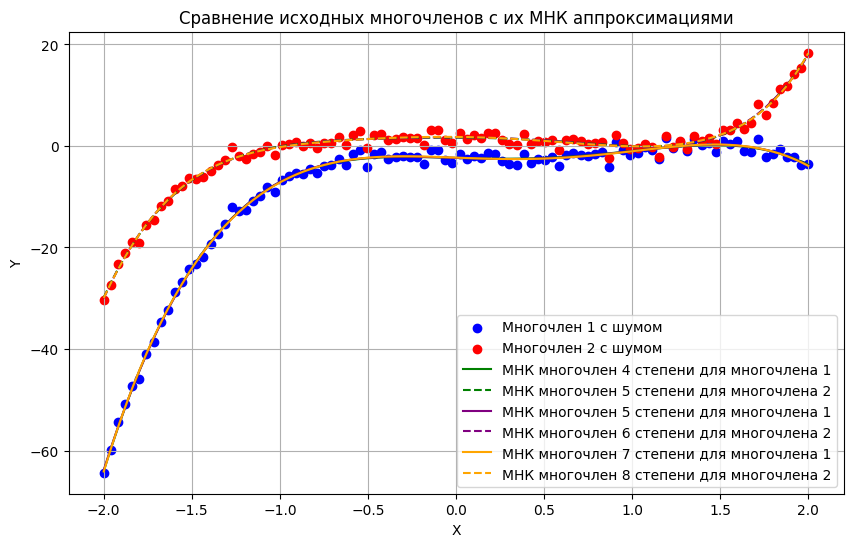

In [25]:
#3.1 Сразу для двух полиномов
def polynomial_1(x):
    return -2 * x**4 + 4 * x**3 - x - 2

def polynomial_2(x):
    return x**5 - x**3 - 2 * x**2 + 2

X = np.linspace(-2, 2, 100)
Y_1 = polynomial_1(X)
Y_2 = polynomial_2(X)

E = np.random.normal(loc=0, scale=1, size=X.shape[0])

plt.figure(figsize=(10, 6))
plt.scatter(X, Y_1 + E, label='Многочлен 1 с шумом', color='blue')
plt.scatter(X, Y_2 + E, label='Многочлен 2 с шумом', color='red')

degrees_1 = [4, 5, 7]
degrees_2 = [5, 6, 8]

colors = ['green', 'purple', 'orange']

for degree_1, degree_2, color in zip(degrees_1, degrees_2, colors):
    poly_features_1 = PolynomialFeatures(degree=degree_1)
    X_poly_1 = poly_features_1.fit_transform(X.reshape(-1, 1))
    model_1 = LinearRegression()
    model_1.fit(X_poly_1, Y_1 + E)
    Y_pred_1 = model_1.predict(X_poly_1)
    plt.plot(X, Y_pred_1, label=f'МНК многочлен {degree_1} степени для многочлена 1', color=color)

    poly_features_2 = PolynomialFeatures(degree=degree_2)
    X_poly_2 = poly_features_2.fit_transform(X.reshape(-1, 1))
    model_2 = LinearRegression()
    model_2.fit(X_poly_2, Y_2 + E)
    Y_pred_2 = model_2.predict(X_poly_2)
    plt.plot(X, Y_pred_2, label=f'МНК многочлен {degree_2} степени для многочлена 2', linestyle='--', color=color)

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Сравнение исходных многочленов с их МНК аппроксимациями')
plt.grid(True)
plt.show()